In [1]:
import sys
sys.path.append("/Users/akashanand/repo/maestro")
%load_ext autoreload
%autoreload 2

In [27]:
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import math

In [3]:
from maestro.connector.kite_connector import KiteConnector
from maestro.historical.fetch_historical_data import HistoricalDataFetcher, Interval, get_today, get_date_before_today
from maestro.instruments.kite_instruments import TradingInstruments, ExchangeType

In [4]:
connector = KiteConnector()

Goto this url and get the request token from the redirect link: https://kite.zerodha.com/connect/login?api_key=9kxpk63gv7k76agn&v=3


In [5]:
instruments = TradingInstruments(connector, live=False)

In [13]:
nse_instruments = instruments.get_instruments_by_exchange(ExchangeType.NSE)
print(len(nse_instruments))

5234


In [7]:
history_fetcher = HistoricalDataFetcher(connector)

In [ ]:
out_dict = {}

In [18]:
to_date = get_today()
from_date = get_date_before_today(60)
for instrument in tqdm.tqdm(nse_instruments):
    token = instrument["instrument_token"]
    if token in out_dict:
        continue
    prices = history_fetcher.fetch_historical_data(token, from_date, to_date, Interval.MINUTE)
    out_dict[token] = prices


100%|██████████| 5234/5234 [26:29<00:00,  3.29it/s]  


In [19]:
import pickle
with open("/Users/akashanand/repo/maestro/data/data.pickle", "wb") as f:
    pickle.dump(out_dict, f)

In [30]:
# Instrument wise data with money flow
instrument_wise_cash_flow = []
for instrument in tqdm.tqdm(out_dict.keys()):
    temp = []
    for row in out_dict[instrument]:
        temp.append(row["close"] * row["volume"])
    if len(temp) > 0:
        flow = sum(temp)/len(temp)
    else:
        flow = 0
    instrument_wise_cash_flow.append({"instrument": instrument, "flow": flow})



100%|██████████| 5234/5234 [00:31<00:00, 164.01it/s] 


In [35]:
# Sort by cash flow
instrument_wise_cash_sorted = sorted(instrument_wise_cash_flow, key=lambda x: x["flow"], reverse=True)
print("All instruments: ", len(instrument_wise_cash_sorted))
instrument_wise_cash_sorted = [x for x in instrument_wise_cash_sorted if x["flow"] > 0]
print("Positive instruments: ", len(instrument_wise_cash_sorted))
# Sample 500 random instruments
import random
random.seed(42)
instrument_wise_cash_sorted = sorted(random.sample(instrument_wise_cash_sorted, 500), key=lambda x: x["flow"], reverse=True)


All instruments:  5234
Positive instruments:  2709


In [37]:
small_dict = {}
for instrument in instrument_wise_cash_sorted:
    small_dict[instrument["instrument"]] = out_dict[instrument["instrument"]]

import pickle
with open("/Users/akashanand/repo/maestro/data/data_small.pickle", "wb") as f:
    pickle.dump(small_dict, f)

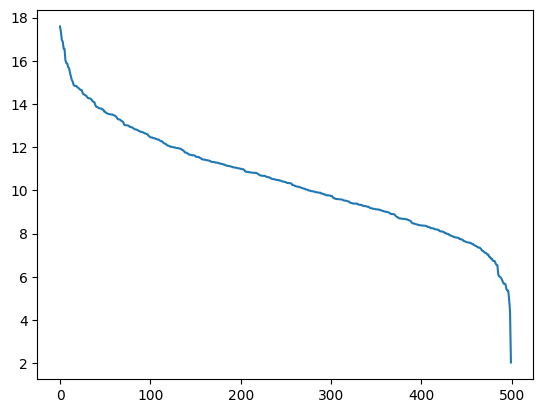

In [36]:
# Plot the cash flow in log scale
plt.plot([math.log(x["flow"]) for x in instrument_wise_cash_sorted if x["flow"] > 0])

In [69]:
import pandas as pd
pd_rel = pd.DataFrame(rel)
pd_rel

,instrument_token,exchange_token,tradingsymbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
0,3376129,13188,RCOM-BE,RELIANCE COMMUNICATIONS L,0.0,,0.0,0.05,1,EQ,NSE,NSE
1,2470913,9652,RELCHEMQ,RELIANCE CHEMOTEX IND,0.0,,0.0,0.05,1,EQ,NSE,NSE
2,738561,2885,RELIANCE,RELIANCE INDUSTRIES,0.0,,0.0,0.05,1,EQ,NSE,NSE
3,141569,553,RELINFRA,RELIANCE INFRASTRUCTU,0.0,,0.0,0.05,1,EQ,NSE,NSE
4,5563649,21733,RHFL,RELIANCE HOME FINANCE,0.0,,0.0,0.05,1,EQ,NSE,NSE
5,745473,2912,RIIL,RELIANCE INDUSTRIAL INFRA,0.0,,0.0,0.05,1,EQ,NSE,NSE
6,3906305,15259,RPOWER,RELIANCE POWER.,0.0,,0.0,0.05,1,EQ,NSE,NSE


In [61]:
pd_nse["exchange"].value_counts()

NFO    301
BSE     18
NSE      9
Name: exchange, dtype: int64

In [56]:
pd_nse["segment"].value_counts()

BSE        11147
INDICES       55
Name: segment, dtype: int64

In [57]:
pd_nse["instrument_type"].value_counts()

EQ    11202
Name: instrument_type, dtype: int64

In [58]:
pd_nse.head()

,instrument_token,exchange_token,tradingsymbol,name,last_price,expiry,strike,tick_size,lot_size,instrument_type,segment,exchange
0,245876996,960457,0001AIPL24,,0.0,,0.0,0.01,10,EQ,BSE,BSE
1,245304324,958220,001CSSL25,,0.0,,0.0,0.01,1,EQ,BSE,BSE
2,249407492,974248,001HCCL26,,0.0,,0.0,0.01,1,EQ,BSE,BSE
3,249406980,974246,001HCCL29,,0.0,,0.0,0.01,1,EQ,BSE,BSE
4,249407236,974247,001HCCL29A,,0.0,,0.0,0.01,1,EQ,BSE,BSE
